In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
import re
rc('font',size=16)

In [3]:
machine_pattern = re.compile("## (.*)")
log_pattern = re.compile("Normal: (.*)")
o1_pattern = re.compile("O1 NQT: (.*)")
o2_pattern = re.compile("O2 NQT: (.*)")

In [4]:
filename = 'athenak_timings.dat'
with open(filename, 'r') as file:
    contents = file.read()
    machines = list(re.findall(machine_pattern, contents))
    tlg = np.array([eval(v) for v in re.findall(log_pattern, contents)])
    to1 = np.array([eval(v) for v in re.findall(o1_pattern, contents)])
    to2 = np.array([eval(v) for v in re.findall(o2_pattern, contents)])
machines = list([m.lstrip('Nvidia').lstrip('AMD').lstrip('Intel') for m in machines])
machines = list([m.split('(')[0].rstrip() for m in machines])
so1 = to1 / tlg
so2 = to2 / tlg

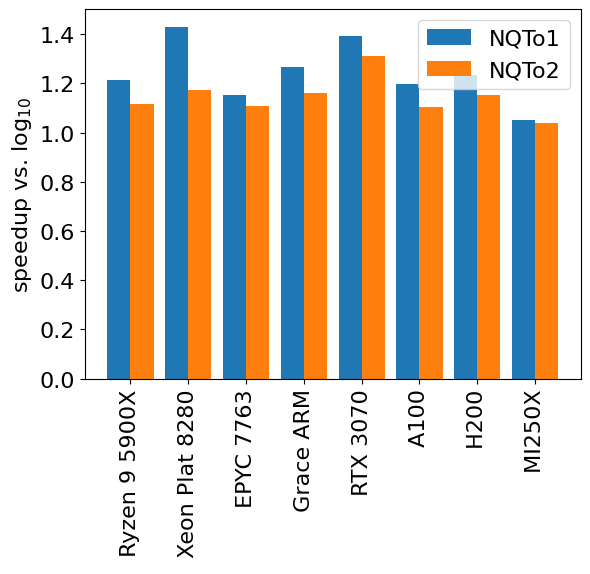

In [8]:
bar_width = 0.4
index = np.arange(len(machines))+1

#plt.bar(index - bar_width, tlg, bar_width, 
#        label='log')
plt.bar(index - bar_width/2, so1, bar_width, 
               label='NQTo1')
plt.bar(index + bar_width/2, so2, bar_width, 
               label='NQTo2')

plt.legend()

ax = plt.gca()
ax.set_xticks(index)
ax.set_xticklabels(machines,rotation=90)
#ax.set_yscale('log')

plt.ylabel(r'speedup vs. $\log_{10}$')
plt.savefig('athenak_speedups.png',bbox_inches='tight')
plt.savefig('athenak_speedups.pdf',bbox_inches='tight')